In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
description = pd.read_csv("/kaggle/input/crimes-against-women-in-india-2001-2021/description.csv")

In [4]:
description.head()

,Unnamed: 0,Column Names,Explanation
0,0,State,State
1,1,Year,Year
2,2,Rape,No. of Rape cases
3,3,K&A,Kidnap And Assault
4,4,DD,Dowry Deaths


In [5]:
data = pd.read_csv("/kaggle/input/crimes-against-women-in-india-2001-2021/CrimesOnWomenData.csv")

In [6]:
data.head()

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [7]:
data.describe()

,Unnamed: 0,Year,Rape,K&A,DD,AoW,AoM,DV,WT
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,367.500000,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565
std,212.609188,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.750000,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000
50%,367.500000,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000
75%,551.250000,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000
max,735.000000,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  736 non-null    int64 
 1   State       736 non-null    object
 2   Year        736 non-null    int64 
 3   Rape        736 non-null    int64 
 4   K&A         736 non-null    int64 
 5   DD          736 non-null    int64 
 6   AoW         736 non-null    int64 
 7   AoM         736 non-null    int64 
 8   DV          736 non-null    int64 
 9   WT          736 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 57.6+ KB


In [9]:
print("Total number of entries : ", len(data))
print("Total number of States : ", data['State'].nunique())
print("Years covered : ", data['Year'].min(), "-", data['Year'].max())
print("Missing values in each column :")
print(data.isnull().sum())

Total number of entries :  736
Total number of States :  70
Years covered :  2001 - 2021
Missing values in each column :
Unnamed: 0    0
State         0
Year          0
Rape          0
K&A           0
DD            0
AoW           0
AoM           0
DV            0
WT            0
dtype: int64


In [10]:
yearly_data = data.groupby('Year').sum().reset_index()

fig = px.line(yearly_data, x='Year', y=['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT'],
             title = "Trend of Different Crimes Against Women (2001-2021)")

fig.show()

In [11]:
# Create traces for each crime type
fig = go.Figure()

# Trace for Rape with red color and increased thickness
fig.add_trace(go.Scatter(x=yearly_data['Year'], y=yearly_data['Rape'],
                         mode='lines', 
                         name='Rape',
                         line=dict(color='red', width=3)))

# Traces for other crimes
for crime in ['K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']:
    fig.add_trace(go.Scatter(x=yearly_data['Year'], y=yearly_data[crime],
                             mode='lines', 
                             name=crime))

# Update layout
fig.update_layout(title="Trend of Different Crimes Against Women (2001-2021)",
                  xaxis_title='Year',
                  yaxis_title='Number of Cases',
                  template='plotly_white')

fig.show()

In [12]:
yearlyRapeData = data.groupby('Year')['Rape'].sum().reset_index()

maxYear = yearlyRapeData.loc[yearlyRapeData["Rape"].idxmax()]

fig = go.Figure()

fig.add_trace(go.Bar(x=yearlyRapeData['Year'],
                    y=yearlyRapeData['Rape'],
                    marker_color='darkred',
                    name="Total Rape Cases"))

fig.add_trace(go.Scatter(x=yearlyRapeData["Year"],
                        y=yearlyRapeData["Rape"],
                        mode="lines",
                        line=dict(color="black", width=2),
                        name="Trend Line"))

fig.add_trace(go.Scatter(x=[maxYear['Year']],
                        y=[maxYear["Rape"]],
                        mode="markers+text",
                        marker=dict(color='blue',
                                   size=12,
                                   symbol='circle'),
                        text=[f'Max : {maxYear["Rape"]}'],
                        textposition='top center',
                        name="Maximum Cases"))

fig.update_layout(title="Total Rape Cases Every Year (2001-2021)",
                  xaxis_title="Year",
                  yaxis_title="No. of Cases",
                  template="plotly_white")

fig.show() 

'''


fig = px.bar(yearlyRapeData,
            x="Year",
            y="Rape",
            title="Total Rape Cases Every Year (2001-2021)",
            labels={"Rape":"Number of Rape Cases"},
            color_discrete_sequence=['red'])

fig.update_traces(marker_line_width=1.5)
fig.update_layout(xaxis_title="Year",
                 yaxis_title="Total Rape Cases")

fig.show()
'''

'\n\n\nfig = px.bar(yearlyRapeData,\n            x="Year",\n            y="Rape",\n            title="Total Rape Cases Every Year (2001-2021)",\n            labels={"Rape":"Number of Rape Cases"},\n            color_discrete_sequence=[\'red\'])\n\nfig.update_traces(marker_line_width=1.5)\nfig.update_layout(xaxis_title="Year",\n                 yaxis_title="Total Rape Cases")\n\nfig.show()\n'

In [13]:
# Grouping data by state and summing the values
state_data = data.groupby("State").sum().reset_index()

# Define the color mapping for each crime category
color_map = {
    "Rape": "red",
    "K&A": "blue",
    "DD": "green",
    "AoW": "orange",
    "AoM": "purple",
    "DV": "brown",
    "WT": "pink"
}

# Plotting the stacked bar chart
fig = px.bar(state_data,
             x="State",
             y=["Rape", "K&A", "DD", "AoW", "AoM", "DV", "WT"],
             title="State-Wise Total Crimes Against Women (2001-2021)",
             barmode="stack",
             color_discrete_map=color_map)

# Display the plot
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [14]:
# Filter out states with significant data
states_with_data = data['State'].value_counts()[data['State'].value_counts() > 5].index
filtered_data = data[data['State'].isin(states_with_data)]

# Plot trends for each state
fig = px.line(filtered_data, x='Year', y=['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT'],
              color='State',
              title='Crime Trends Against Women by State (2001-2021)',
              labels={'variable': 'Crime Type', 'value': 'Number of Cases'},
              line_dash_sequence=['solid', 'dash', 'dot', 'dashdot', 'solid', 'dash', 'dot'])

fig.update_layout(legend_title_text='State')
fig.show()

In [15]:
state_data['Total_Crimes'] = state_data[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']].sum(axis=1)

# Get the top 5 states with the highest total number of crimes
top5_states = state_data.nlargest(5, 'Total_Crimes')['State']

# Filter state_data to include only the top 5 states
top5_state_data = state_data[state_data['State'].isin(top5_states)]

# Define the color mapping for each crime category
color_map = {
    "Rape": "red",
    "K&A": "blue",
    "DD": "green",
    "AoW": "orange",
    "AoM": "purple",
    "DV": "brown",
    "WT": "pink"
}

# Plotting the stacked bar chart for top 5 states
fig = px.bar(top5_state_data,
             x="State",
             y=["Rape", "K&A", "DD", "AoW", "AoM", "DV", "WT"],
             title="Top 5 States with Highest Total Crimes Against Women (2001-2021)",
             barmode="stack",
             color_discrete_map=color_map)

# Display the plot
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [16]:
state_data['Total_Crimes'] = state_data[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']].sum(axis=1)

# Get the top 5 states with the highest total number of crimes
top5_states = state_data.nlargest(5, 'Total_Crimes')['State']

# Filter state_data to include only the top 5 states
top5_state_data = state_data[state_data['State'].isin(top5_states)]

# Sort the filtered data by total crimes in descending order
top5_state_data = top5_state_data.sort_values(by='Total_Crimes', ascending=False)

# Define the color mapping for each crime category
color_map = {
    "Rape": "red",
    "K&A": "blue",
    "DD": "green",
    "AoW": "orange",
    "AoM": "purple",
    "DV": "brown",
    "WT": "pink"
}

# Plotting the stacked bar chart for top 5 states
fig = px.bar(top5_state_data,
             x="State",
             y=["Rape", "K&A", "DD", "AoW", "AoM", "DV", "WT"],
             title="Top 5 States with Highest Total Crimes Against Women (2001-2021)",
             barmode="stack",
             color_discrete_map=color_map)

# Display the plot
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



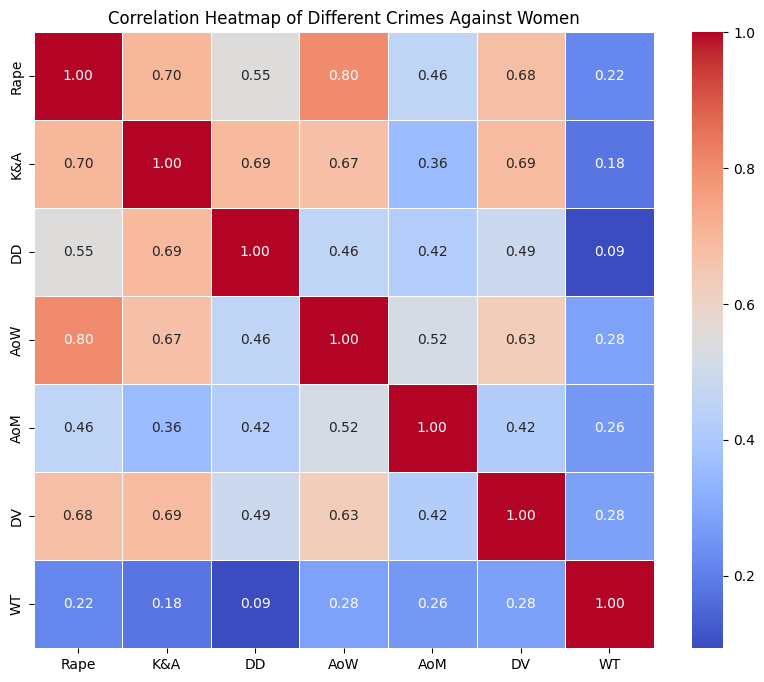

In [17]:
correlation_matrix = data[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Different Crimes Against Women')
plt.show()

In [18]:
import requests
import pandas as pd

# Your API key (replace with your actual API key)
api_key = 'YOUR_GOOGLE_MAPS_API_KEY'

# List of Indian states
states = [
    'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHHATTISGARH'
    # Add more states as needed
]

# Function to get coordinates for a state
def get_coordinates(state):
    endpoint = f'https://maps.googleapis.com/maps/api/geocode/json?address={state},India&key={api_key}'
    response = requests.get(endpoint)
    result = response.json()
    if result['status'] == 'OK':
        location = result['results'][0]['geometry']['location']
        return location['lat'], location['lng']
    return None, None

# Collect data
coordinates = []
for state in states:
    lat, lng = get_coordinates(state)
    coordinates.append([state, lat, lng])

# Create DataFrame
coordinates_df = pd.DataFrame(coordinates, columns=['State', 'Latitude', 'Longitude'])

# Save to CSV
coordinates_df.to_csv('state_coordinates.csv', index=False)

print("Coordinates data saved to 'state_coordinates.csv'")

Coordinates data saved to 'state_coordinates.csv'


In [19]:
# 3. Yearly Breakdown for Top States
top_states = data.groupby('State').sum().nlargest(5, 'Total_Crimes').index
top_states_data = data[data['State'].isin(top_states)]

# Plot yearly trends for top states
fig = px.line(top_states_data, x='Year', y=['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT'],
              color='State', line_dash='State',
              title='Yearly Crime Trends for Top 5 States (2001-2021)')
fig.update_layout(legend_title_text='State')
fig.show()

KeyError: 'Total_Crimes'